In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization,add
from tensorflow.keras.models  import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
import os


In [1]:
cd drive/MyDrive/viem_phoi/du_doan_viem_phoi/

/content/drive/MyDrive/viem_phoi/du_doan_viem_phoi


In [ ]:
train_dir = './chest_xray/train'
val_dir = './chest_xray/val'
test_dir = './chest_xray/test'


In [ ]:
target_shape = (224,224) 

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255.0,
                               horizontal_flip=True,
                               zoom_range=0.2,
                               shear_range=0.2) 
val_gen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data_gen = train_gen.flow_from_directory(train_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 
val_data_gen = val_gen.flow_from_directory(val_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in vgg.layers:
    layer.trainable = False #making all the layers non-trainable
    
x = Flatten()(vgg.output) #flattening out the last layer
predictions = Dense(2,activation='softmax')(x) #Dense layer to predict wether their is pneumonia or not
model = Model(inputs=vgg.input, outputs=predictions)
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

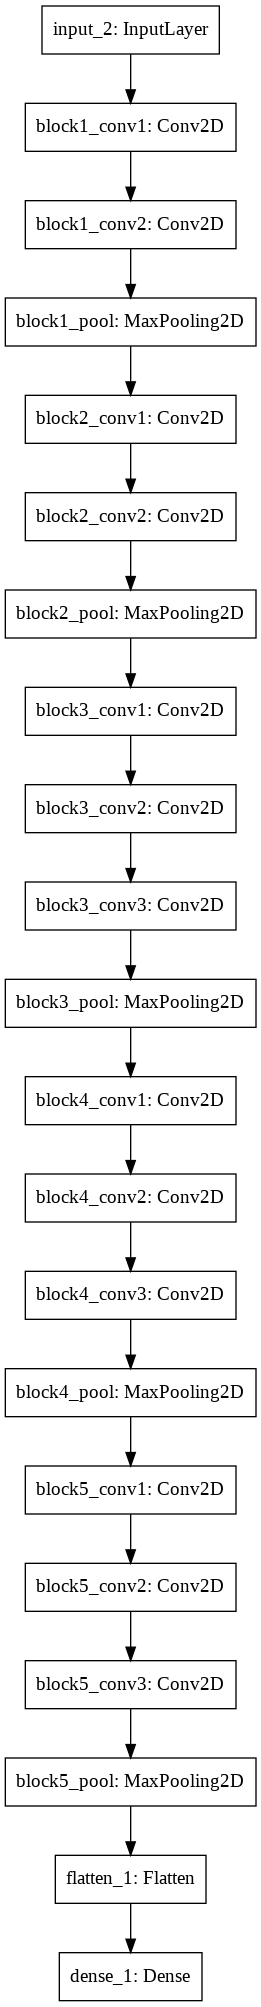

In [ ]:
plot_model(model, to_file='model.png')

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit_generator(train_data_gen,
        steps_per_epoch=20,
        epochs=20,
        validation_data=val_data_gen,
        validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 [==============================] - 186s 9s/step - loss: 1.1863 - accuracy: 0.6068 - val_loss: 0.3243 - val_accuracy: 0.7500
Epoch 2/20
20/20 [==============================] - 170s 8s/step - loss: 0.2923 - accuracy: 0.8769
Epoch 3/20
20/20 [==============================] - 172s 8s/step - loss: 0.1734 - accuracy: 0.9071
Epoch 4/20
20/20 [==============================] - 172s 8s/step - loss: 0.1558 - accuracy: 0.9224
Epoch 5/20
20/20 [==============================] - 172s 8s/step - loss: 0.1681 - accuracy: 0.9267
Epoch 6/20
20/20 [==============================] - 171s 8s/step - loss: 0.1910 - accuracy: 0.9212
Epoch 7/20
20/20 [==============================] - 185s 9s/step - loss: 0.1527 - accuracy: 0.9454
Epoch 8/20
20/20 [==============================] - 174s 9s/step - loss: 0.1336 - accuracy: 0.9569
Epoch 9/20
20/20 [==============================] - 171s 8s/step - loss: 0.1421 - accuracy: 0.9225
Epoch 10/20
20/20 [==============================] - 175s 9s/step -

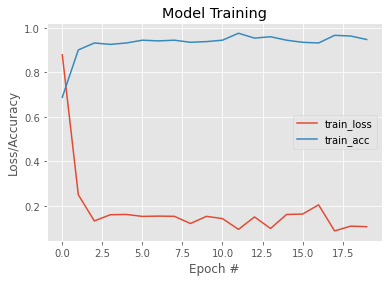

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot( history.history["loss"], label="train_loss")
plt.plot( history.history["accuracy"], label="train_acc")
plt.title("Model Training")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("epochs.png")

In [ ]:
val_loss, val_acc = model.evaluate(val_data_gen, verbose=2)


1/1 - 8s - loss: 0.2122 - accuracy: 0.9375


In [ ]:
model.save('model.h5')

In [3]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import os
test_normal_dir = os.path.join(test_dir, 'PNEUMONIA')
IMG = 'person100_bacteria_475.jpeg'
img = load_img(test_normal_dir + '/' + IMG, target_size = (224, 224))

from tensorflow.keras.preprocessing.image import img_to_array
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

In [ ]:
predictions = model.predict(x, batch_size=1)

In [ ]:
predictions[0][0]

0.0

In [ ]:
if(predictions[0][0] > 0.5):
  print("Image is normal")
else:
  print("image is pneumonia")

image is pneumonia


In [4]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
batch_size = 1
uploaded = files.upload()
for fn in uploaded.keys():
  path = './' + fn
  img = image.load_img(path, target_size = (224, 224))
  x = image.img_to_array(img) / 255
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  print(images.shape)
  classes = model.predict(images, batch_size)
  if classes[0][0] > 0.5:
    print(fn + " is a normal")
  else:
    print(fn + " is a pneumonia")

Saving person1660_virus_2869.jpeg to person1660_virus_2869 (5).jpeg
(1, 224, 224, 3)
person1660_virus_2869.jpeg is a pneumonia
